In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set figure size default
plt.rcParams['figure.figsize'] = (12, 6)

print("All imported successfully!")

All imported successfully!


In [2]:
df=pd.read_csv('cleaned_goodreads_books.csv')
print("Dataset shape: {df.shape}")
df.head()

Dataset shape: {df.shape}


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


Univariate Analysis:

In [3]:
#Separate numerical and categorical columns
num_cols=df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols=df.select_dtypes(include=['object','category']).columns.tolist()

print(f"Numerical columns: ({len(num_cols)}):{num_cols}")
print(f"Categorical columns: ({len(cat_cols)}):{cat_cols}")

Numerical columns: (6):['bookID', 'average_rating', 'isbn13', 'num_pages', 'ratings_count', 'text_reviews_count']
Categorical columns: (6):['title', 'authors', 'isbn', 'language_code', 'publication_date', 'publisher']


/var/folders/hb/58yjqjd93csb4jkrlmh132_00000gp/T/ipykernel_5914/1084616251.py:3: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols=df.select_dtypes(include=['object','category']).columns.tolist()


In [4]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
bookID,11123.0,2.131086e+04,1.309473e+04,1.000000e+00,1.027750e+04,2.028700e+04,3.210450e+04,4.564100e+04
average_rating,11123.0,3.934075e+00,3.504853e-01,0.000000e+00,3.770000e+00,3.960000e+00,4.140000e+00,5.000000e+00
isbn13,11123.0,9.759880e+12,4.429758e+11,8.987060e+09,9.780345e+12,9.780582e+12,9.780872e+12,9.790008e+12
num_pages,11123.0,3.364056e+02,2.411526e+02,0.000000e+00,1.920000e+02,2.990000e+02,4.160000e+02,6.576000e+03
ratings_count,11123.0,1.794285e+04,1.124992e+05,0.000000e+00,1.040000e+02,7.450000e+02,5.000500e+03,4.597666e+06
text_reviews_count,11123.0,5.420481e+02,2.576620e+03,0.000000e+00,9.000000e+00,4.700000e+01,2.380000e+02,9.426500e+04


In [5]:
# Additional statistics
stats_df = pd.DataFrame({
    'mean': df[num_cols].mean(),
    'median': df[num_cols].median(),
    'mode': df[num_cols].mode().iloc[0],
    'std': df[num_cols].std(),
    'variance': df[num_cols].var(),
    'skewness': df[num_cols].skew(),
    'kurtosis': df[num_cols].kurtosis()
})

stats_df

,mean,median,mode,std,variance,skewness,kurtosis
bookID,2.131086e+04,2.028700e+04,1.000000e+00,1.309473e+04,1.714719e+08,0.144010,-1.146588
average_rating,3.934075e+00,3.960000e+00,4.000000e+00,3.504853e-01,1.228400e-01,-3.577441,36.222806
isbn13,9.759880e+12,9.780582e+12,8.987060e+09,4.429758e+11,1.962276e+23,-21.066476,442.473753
num_pages,3.364056e+02,2.990000e+02,2.880000e+02,2.411526e+02,5.815459e+04,4.271778,62.415973
ratings_count,1.794285e+04,7.450000e+02,3.000000e+00,1.124992e+05,1.265606e+10,17.693952,442.271674
text_reviews_count,5.420481e+02,4.700000e+01,0.000000e+00,2.576620e+03,6.638969e+06,16.175096,396.565060


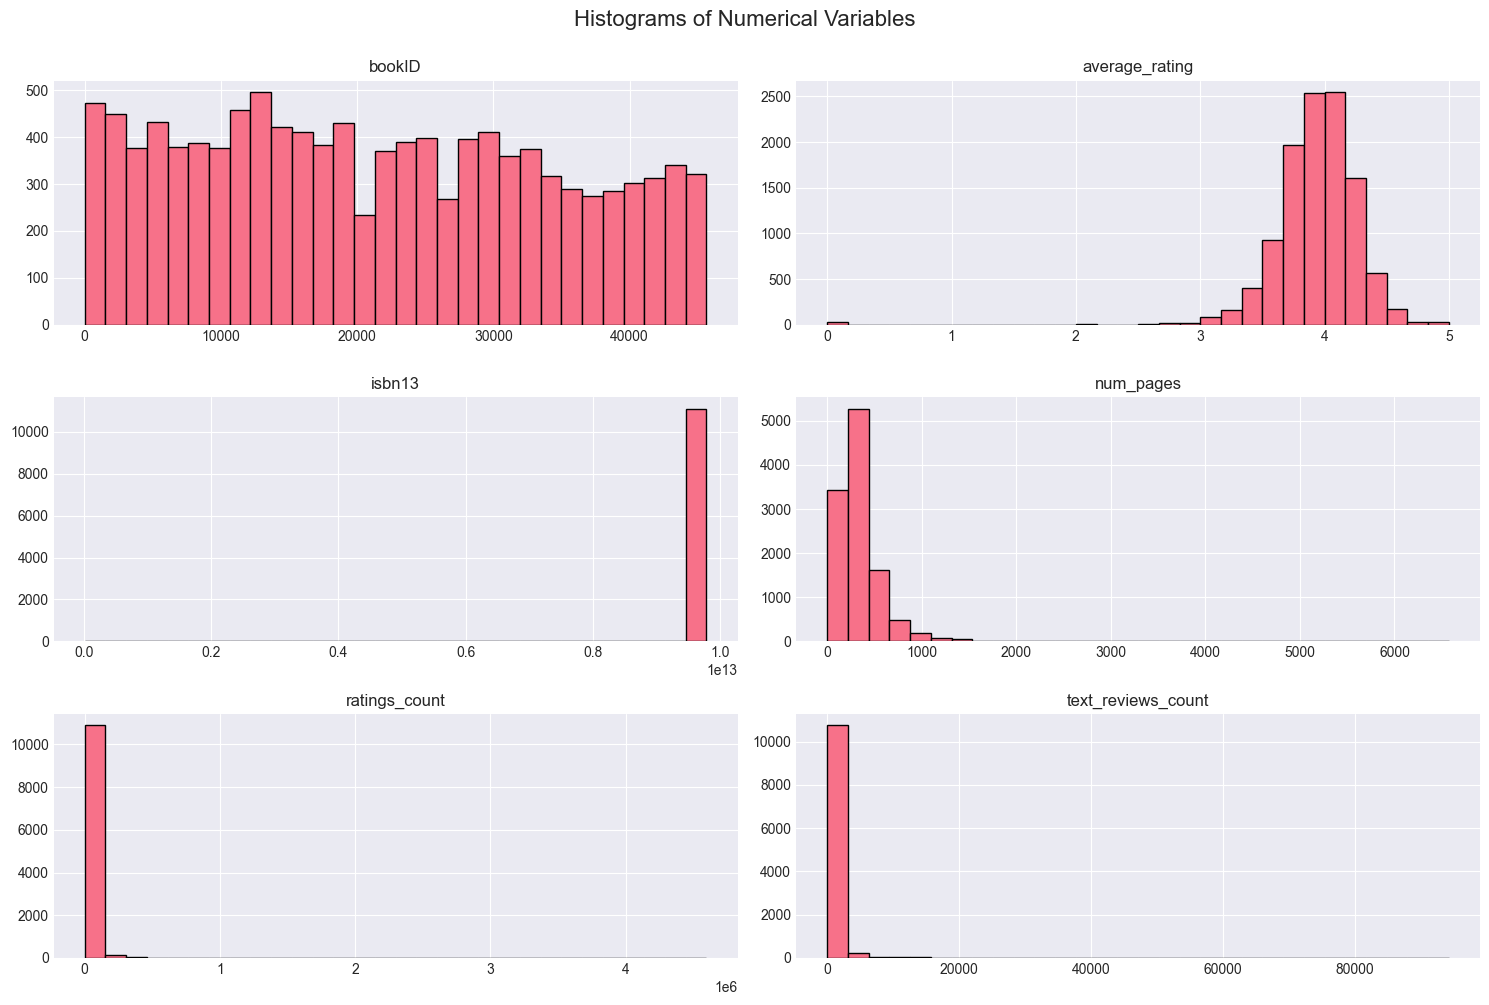

In [6]:
# Histograms for all numerical variables
df[num_cols].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Variables', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

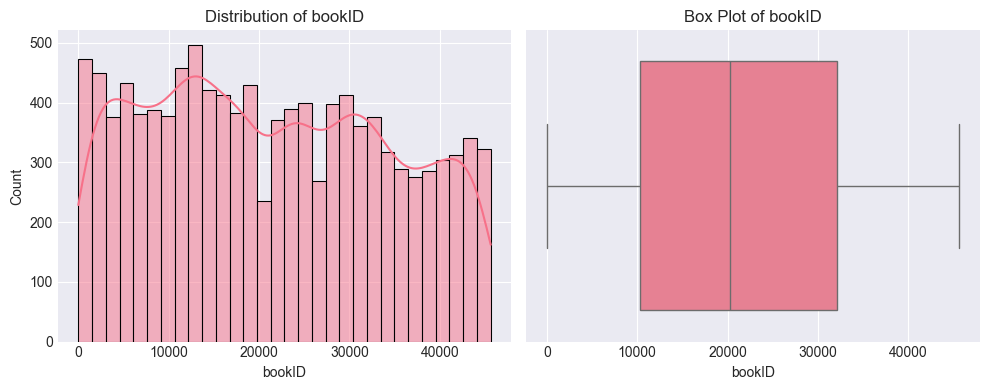

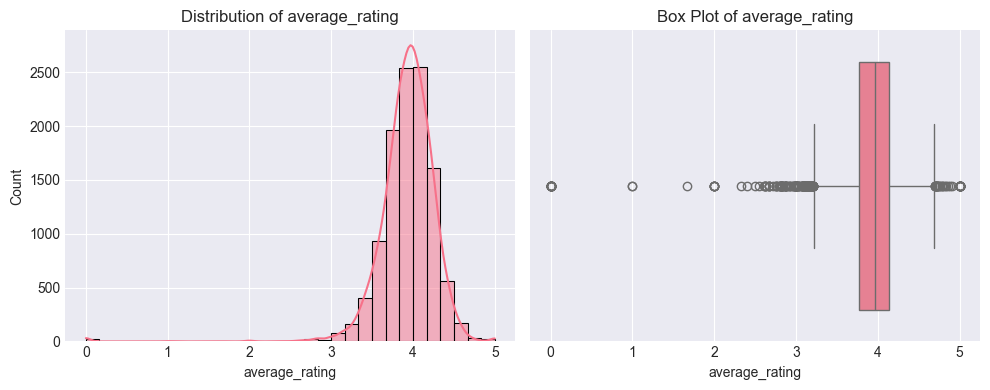

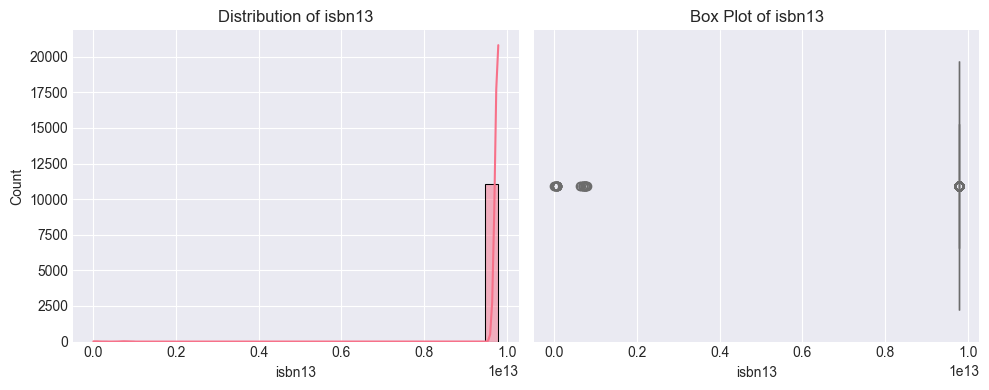

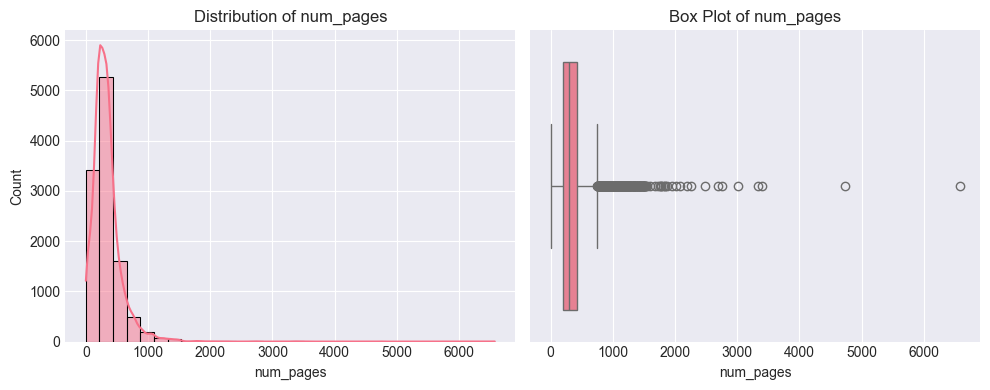

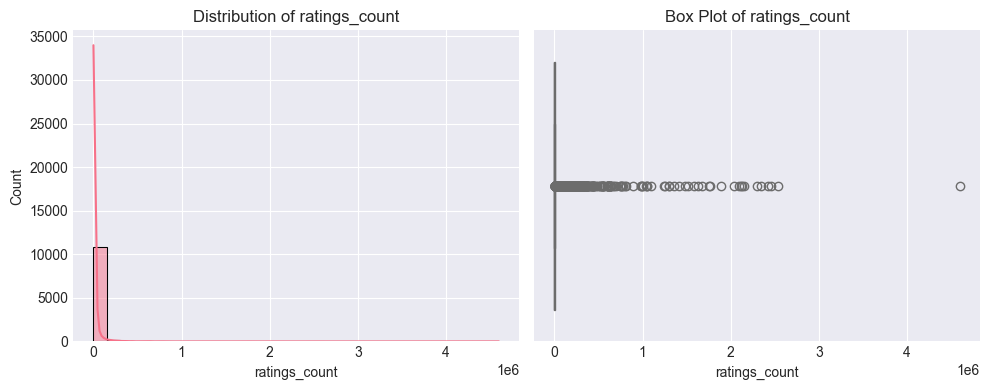

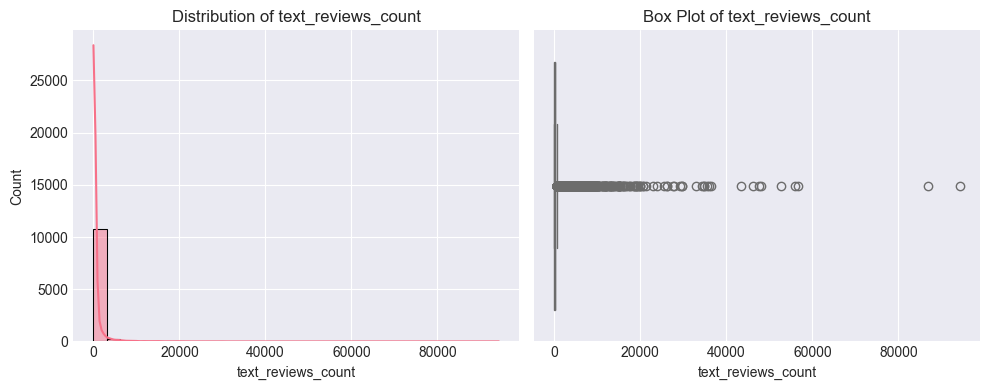

In [7]:
# Distribution plots (histogram + KDE) for each numerical variable
for col in num_cols:
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    
    plt.tight_layout()
    plt.show()

In [8]:
#Value counts for each categorical variable
for col in cat_cols:
    print(f"\n{'='*50}")
    print(f"Value counts for: {col}")
    print(f"{'='*50}")
    print(df[col].value_counts())
    print(f"\nPercentage distribution:")
    print(df[col].value_counts(normalize=True) * 100)


Value counts for: title
title
The Iliad                                           9
The Brothers Karamazov                              9
Anna Karenina                                       8
The Odyssey                                         8
'Salem's Lot                                        8
                                                   ..
Expelled from Eden: A William T. Vollmann Reader    1
You Bright and Risen Angels                         1
The Ice-Shirt (Seven Dreams #1)                     1
Poor People                                         1
Las aventuras de Tom Sawyer                         1
Name: count, Length: 10348, dtype: int64

Percentage distribution:
title
The Iliad                                           0.080913
The Brothers Karamazov                              0.080913
Anna Karenina                                       0.071923
The Odyssey                                         0.071923
'Salem's Lot                                        0.0719

/var/folders/hb/58yjqjd93csb4jkrlmh132_00000gp/T/ipykernel_5914/2721985742.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


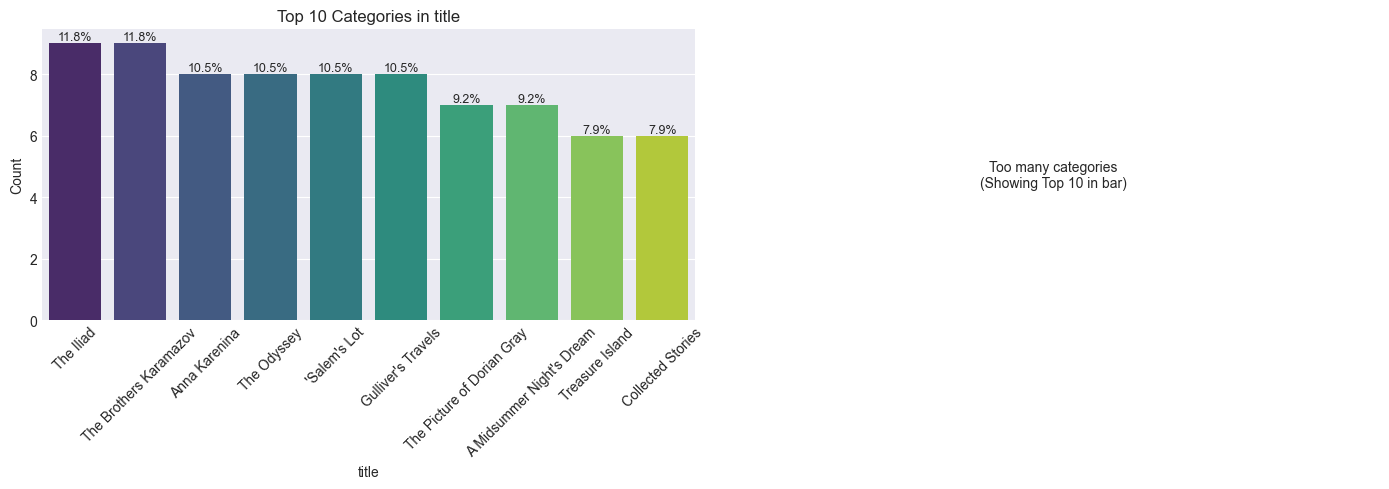

/var/folders/hb/58yjqjd93csb4jkrlmh132_00000gp/T/ipykernel_5914/2721985742.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


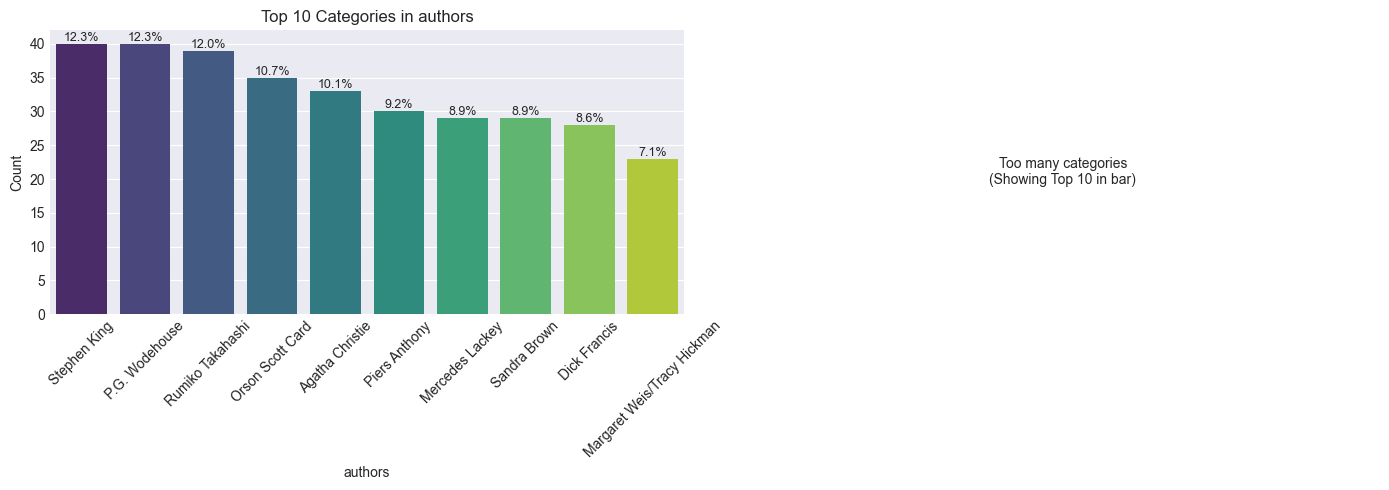

/var/folders/hb/58yjqjd93csb4jkrlmh132_00000gp/T/ipykernel_5914/2721985742.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


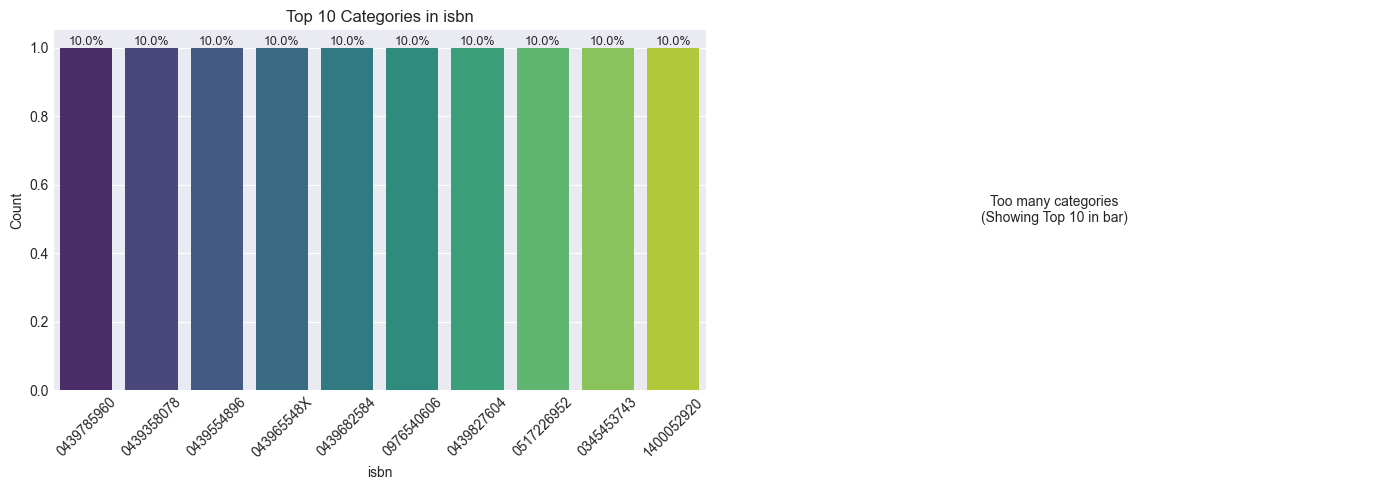

/var/folders/hb/58yjqjd93csb4jkrlmh132_00000gp/T/ipykernel_5914/2721985742.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


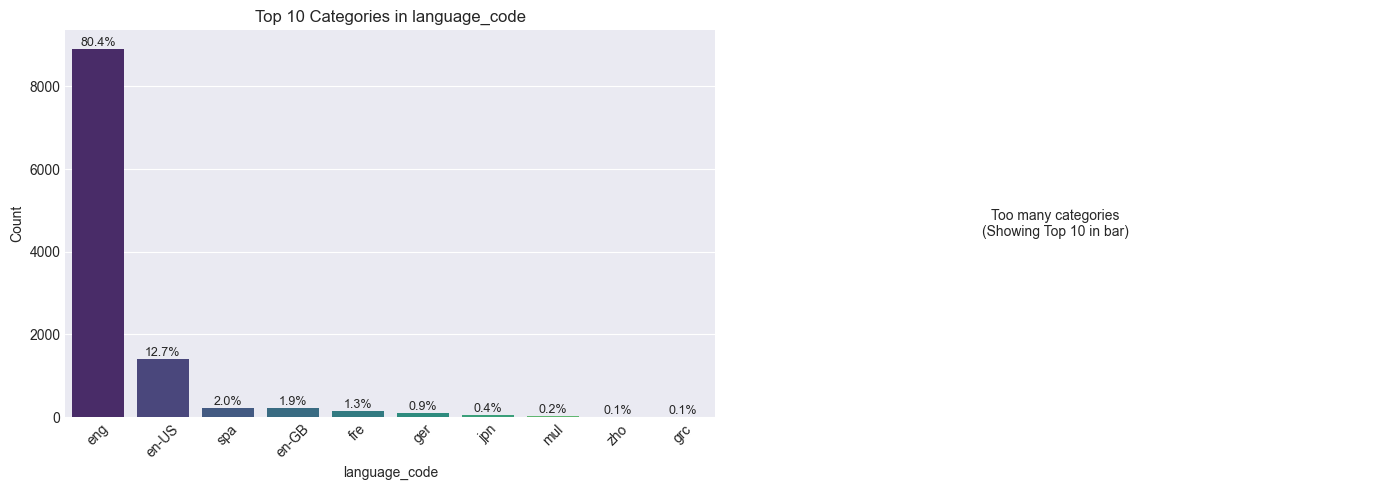

/var/folders/hb/58yjqjd93csb4jkrlmh132_00000gp/T/ipykernel_5914/2721985742.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


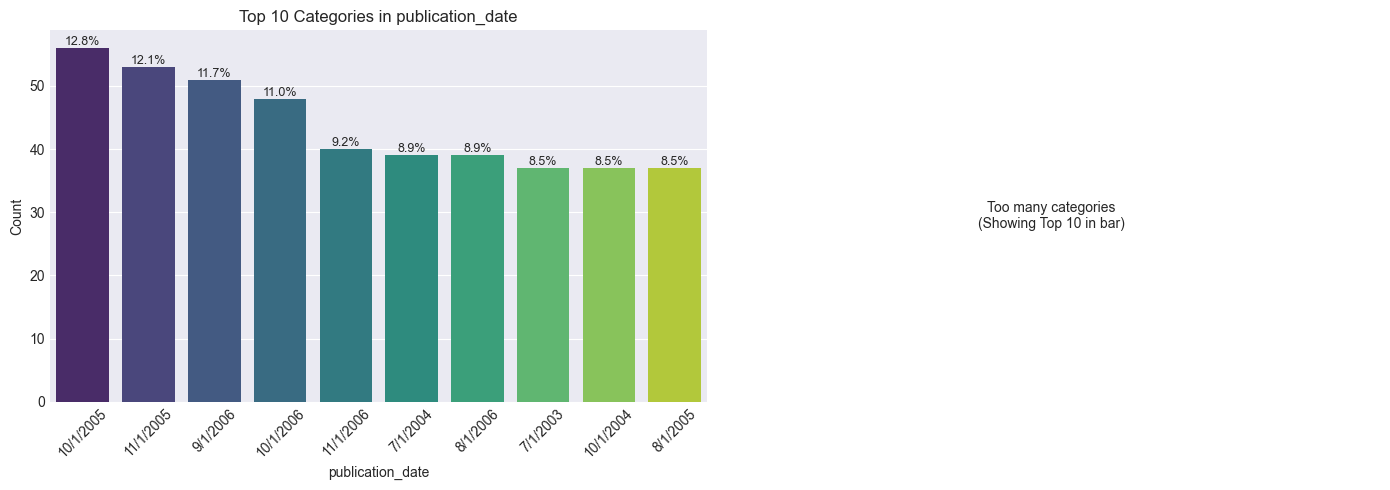

In [10]:


TOP_N = 10   # You can change this to 5, 15, etc.

for col in cat_cols[:5]:   # change slice to explore more columns
    plt.figure(figsize=(14, 5))

    # Get value counts including NaN
    value_counts = df[col].value_counts(dropna=False).head(TOP_N)
    total = value_counts.sum()

    # ---------------- Bar Plot ----------------
    plt.subplot(1, 2, 1)
    ax = sns.barplot(
        x=value_counts.index,
        y=value_counts.values,
        palette="viridis"
    )
    
    plt.xticks(rotation=45)
    plt.title(f'Top {TOP_N} Categories in {col}')
    plt.ylabel("Count")
    plt.xlabel(col)

    # Add percentage labels on bars
    for i, v in enumerate(value_counts.values):
        ax.text(i, v, f"{(v/total)*100:.1f}%", 
                ha='center', va='bottom', fontsize=9)

    # ---------------- Pie Chart ----------------
    plt.subplot(1, 2, 2)
    if df[col].nunique() <= 10:
        value_counts.plot(
            kind='pie',
            autopct='%1.1f%%',
            startangle=90,
            cmap="viridis"
        )
        plt.ylabel('')
        plt.title(f'Proportion of {col}')
    else:
        plt.text(0.5, 0.5, 
                 f'Too many categories\n(Showing Top {TOP_N} in bar)',
                 ha='center', va='center')
        plt.axis('off')

    plt.tight_layout()
    plt.show()
